In [118]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from ipywidgets import Output

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z（S型函数）

    Args:
        z (ndarray): A scalar, numpy array of any size.
        常量，array

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
        z的logistic函数值
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [5]:
z_tmp = np.arange(-10, 11)
y = sigmoid(z_tmp)

print("Input (z), output (sigmoid (z))")
print(np.c_[z_tmp, y])

Input (z), output (sigmoid (z))
[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


Text(0.5, 0, 'z')

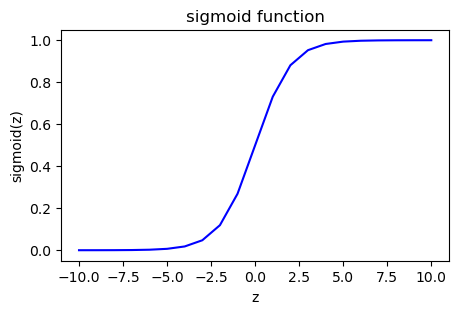

In [7]:
fig, ax=plt.subplots(1, 1, figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
# draw_vthresh(ax,0)

In [33]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [34]:
pos = y == 1
# 将y_train中等于1的元素赋值给pos
# pos中的元素与y_train中的元素相对应，
# 如果y_train中的元素是1，则pos中对应的元素为True，否则为False。
neg = y == 0
# 将y_train中等于0的元素赋值给neg。
# neg中的元素与y_train中的元素相对应，
# 如果y_train中的元素是0，则neg中对应的元素为True，否则为False。

In [35]:
x1_pos = X[:, 0][pos]
x1_neg = X[:, 0][neg]
x2_pos = X[:, 1][pos]
x2_neg = X[:, 1][neg]

In [40]:
y = y.reshape(-1,1) 

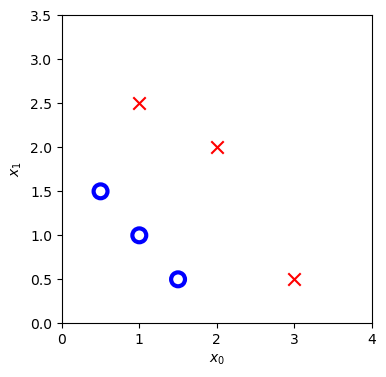

In [41]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.scatter(x1_neg, x2_neg, marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=["blue"],
              lw=3)
plt.scatter(x1_pos, x2_pos, marker='x', s=80, c = 'red', label="y=1")

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

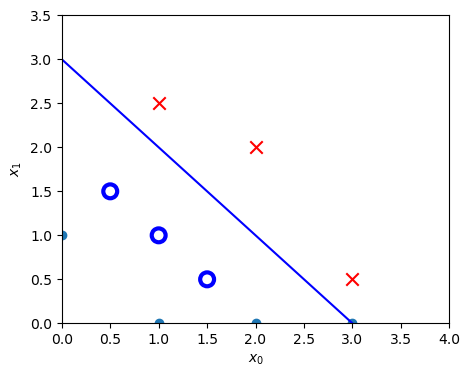

In [44]:
x0 = np.arange(0,6)
x1 = 3 - x0

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='b')
ax.axis([0,4,0,3.5])
plt.scatter(x1_neg, x2_neg, marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=["blue"],
              lw=3)
plt.scatter(x1_pos, x2_pos, marker='x', s=80, c = 'red', label="y=1")

ax.scatter(x1,y)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

In [45]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [46]:
def compute_cost_logistic(X, y, w, b):
    """
    计算logistics函数的cost
    参数：
        X: (ndarray(m, n)) m个观测值，n个特征值
        y: 目标值
        w, b: 模型参数
    返回值：
        cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        
    cost = cost/m
    return cost

In [48]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


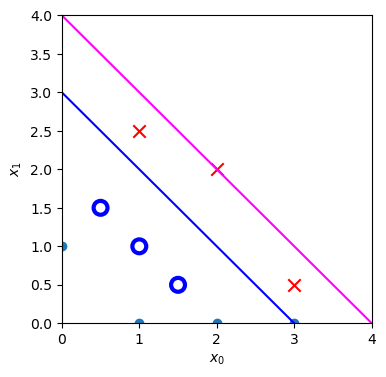

In [53]:
x0 = np.arange(0,6)
# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-3")
ax.plot(x0,x1_other, c="magenta", label="$b$=-4")
ax.axis([0, 4, 0, 4])
plt.scatter(x1_neg, x2_neg, marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=["blue"],
              lw=3)
plt.scatter(x1_pos, x2_pos, marker='x', s=80, c = 'red', label="y=1")

ax.scatter(x1,y)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

In [54]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))
# cost for b = -4 >  b = -3

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [70]:
# 计算梯度
def compute_gradient_logistic(X, y, w, b): 
    """
    计算linear regression的梯度
    参数：
        X: (ndarray(m, n)) m个观测值，n个特征值
        y: 目标值
        w, b: 模型参数
    返回：
        dj_dw (ndarray(n,)) cost的梯度，wrt w
        dj_db 常数 cost的梯度，wrt b
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [71]:
w_tmp = np.array([2.,3.])
b_tmp = 1.

In [72]:
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_train, y_train, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.49833339 0.49883943]
dj_dw: 0.49861806546328574


In [80]:
# 梯度下降
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    计算梯度下降
    参数：
        X(ndarray(m, n)): m个观测值，n个特征值
        y: 目标值
        w_in, b_in: 模型参数
        alpha: learning rate
        num_iters：循环次数
    返回：
        w, b: updated参数
    """
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient_logistic(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [81]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration 0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870456   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216820076   
Iteration 5000: Cost 0.034338477298845684   
Iteration 6000: Cost 0.028603798022120097   
Iteration 7000: Cost 0.024501569608793   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


/var/folders/zk/v3myvj6j6n980dnwgj3g5frm0000gn/T/ipykernel_99837/2765967752.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.scatter(float(w_out[1:,]), b_out)


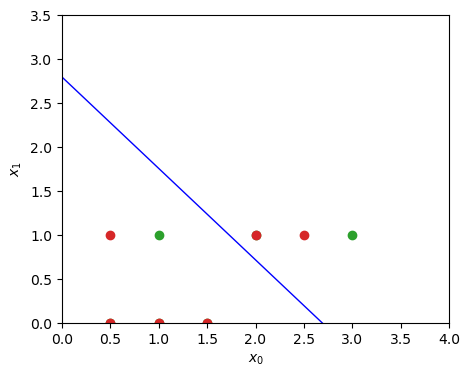

In [106]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt.scatter(float(w_out[1:,]), b_out)
plt.scatter(float(w_out[0]), b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_train[:,1],y_train)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c="blue", lw=1)
plt.show()

In [114]:
# logistic 回归
lr_model = LogisticRegression()
lr_model.fit(X, y)

/Users/mba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [115]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [116]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


In [128]:
# regularization for linear regression
def compute_cost_linear_reg(X, y, w, b, lambda_=1):
    """
    计算所有变量的cost
    参数：
        X ndarray(m, n): 数据，m个观测值，n个特征
        y ndarray(m, ) 目标值
        w ndarray(n, ) 参数
        b 参数
    返回值：
        total_cost
    
    """
    
    m=X.shape[0]
    n=len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost / (2*m)
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j])**2
    reg_cost = (lambda_/(2*m))*reg_cost
    
    total_cost = reg_cost + cost
    
    return total_cost

In [129]:
np.random.seed(1)
# 5行6列的随机变量
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)
print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


In [136]:
# regularization for logistic regression
def compute_cost_logistic(X, y, w, b, lambda_=1):
    """
    计算logistics函数的cost
    参数：
        X: (ndarray(m, n)) m个观测值，n个特征值
        y: 目标值
        w, b: 模型参数
    返回值：
        cost
    """
    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j])**2
    reg_cost = (lambda_/(2*m))*reg_cost
    
    total_cost = reg_cost + cost
    
    return cost

In [137]:
np.random.seed(1)
# 5行6列的随机变量
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)
print("Regularized cost:", cost_tmp)

Regularized cost: 0.6536434800787787


In [138]:
# regularized linear regression 梯度
# 多变量梯度下降
def compute_gradient(X, y, w, b, lambda_=1):
    m, n = X.shape
    # 创建了一个名为dj_dw的NumPy数组，并将其初始化为全零。
    # 数组的大小是(n,)，其中n是一个变量或常数，表示数组的长度或维度。
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]
    return dj_dw, dj_db

In [142]:
np.random.seed(1)
# 5行6列的随机变量
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_dw_tmp, dj_db_tmp =  compute_gradient(X_tmp, y_tmp, w_tmp,b_tmp,lambda_tmp)
print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [147]:
# regularized logistic regression 梯度
def compute_gradient_logistic(X, y, w, b,lambda_=1): 
    """
    计算linear regression的梯度
    参数：
        X: (ndarray(m, n)) m个观测值，n个特征值
        y: 目标值
        w, b: 模型参数
    返回：
        dj_dw (ndarray(n,)) cost的梯度，wrt w
        dj_db 常数 cost的梯度，wrt b
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m)*w[j]
        
    return dj_db, dj_dw  

In [148]:
np.random.seed(1)
# 5行6列的随机变量
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic(X_tmp, y_tmp, w_tmp,b_tmp,lambda_tmp)
print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
